In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This data is collated from https://data.gov.in. It has state-wise and district level data on the various crimes committed against women between 2001 to 2014. Some crimes that are included are Rape, Kidnapping and Abduction, Dowry Deaths etc.

In [2]:
## Reading files

raw_df = pd.read_csv("crimes_against_women_2001-2014.csv")

In [3]:
raw_df.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [4]:
raw_df.drop(raw_df.columns[0],axis=1,inplace=True)
raw_df.shape

(10677, 10)

In [5]:
raw_df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [6]:
raw_df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [7]:
raw_df['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', ..., 'Lakshadweep',
       'Karaikal', 'Puducherry'], dtype=object)

In [8]:
raw_df['DISTRICT'].value_counts().sort_values(ascending=False)

TOTAL          408
G.R.P.          49
SOUTH           41
NORTH           41
WEST            39
              ... 
SPUWAC           1
Vigilance        1
Lakshadweep      1
Karaikal         1
Puducherry       1
Name: DISTRICT, Length: 1605, dtype: int64

In [9]:
raw_df['STATE/UT'].value_counts().sort_values(ascending=False)

UTTAR PRADESH     878
MADHYA PRADESH    628
MAHARASHTRA       552
BIHAR             540
TAMIL NADU        469
                 ... 
A&N Islands         4
Chandigarh          4
D&N Haveli          4
Lakshadweep         4
A & N Islands       4
Name: STATE/UT, Length: 72, dtype: int64

In [10]:
df = raw_df

In [11]:
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [12]:
rape_crime = df[['Year','Rape']].groupby(['Year']).sum().rename(columns={'Rape':"Count"}).reset_index()

In [13]:
rape_crime.head()

,Year,Count
0,2001,32150
1,2002,32746
2,2003,31694
3,2004,36466
4,2005,36718


In [14]:
rape_crime['Crime'] = 'rape'

In [15]:
rape_crime = rape_crime[['Year','Crime',"Count"]]

In [16]:
rape_crime.head()

,Year,Crime,Count
0,2001,rape,32150
1,2002,rape,32746
2,2003,rape,31694
3,2004,rape,36466
4,2005,rape,36718


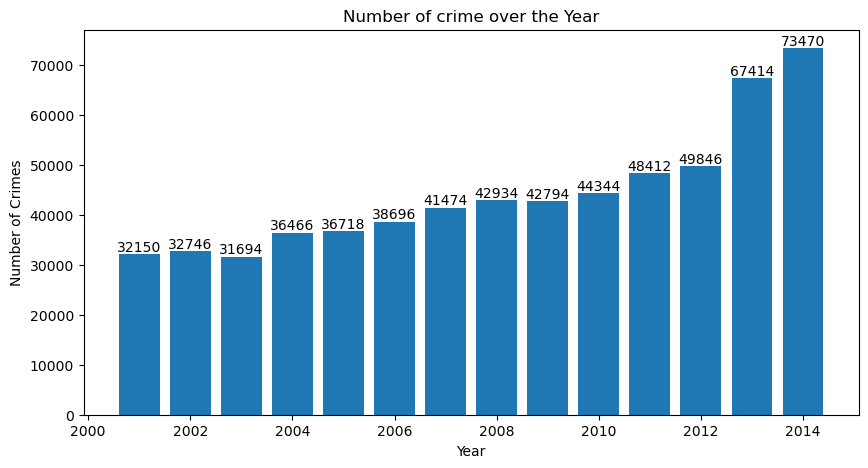

In [17]:
plt.style.use('default')
fig, ax = plt.subplots( figsize=(10, 5))
barh = ax.bar(rape_crime['Year'],rape_crime['Count'])
ax.set(xlabel='Year', ylabel='Number of Crimes',
       title='Number of crime over the Year')
ax.bar_label(barh,fmt='%.f')
plt.show()


In [18]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [19]:
top_five_state_r  = df[["STATE/UT",'Rape']].groupby(['STATE/UT']).sum()\
.rename(columns={'Rape':'Count'})\
.reset_index()\
.sort_values(by='Count',ascending=False)\
.iloc[0:5,:].reset_index(drop=True)

In [20]:
top_five_state_r

,STATE/UT,Count
0,MADHYA PRADESH,72174
1,WEST BENGAL,41574
2,UTTAR PRADESH,38116
3,MAHARASHTRA,35972
4,ASSAM,32356


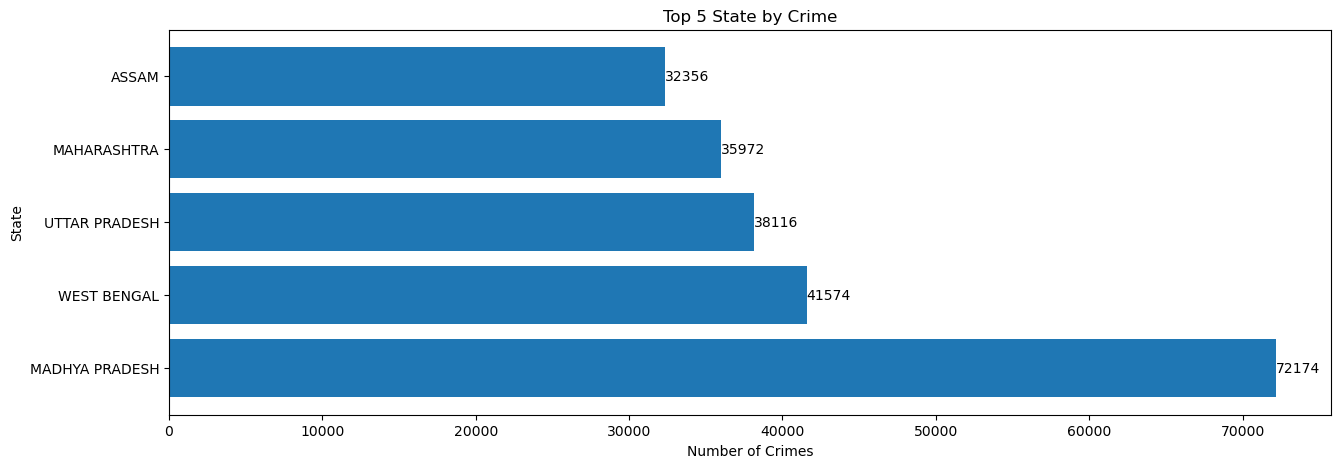

In [21]:
plt.style.use('default')
fig, ax = plt.subplots( figsize=(15, 5))
barh = ax.barh(top_five_state_r['STATE/UT'],top_five_state_r["Count"])
ax.set(xlabel='Number of Crimes', ylabel='State',
       title='Top 5 State by Crime')
ax.bar_label(barh,fmt='%.f')
plt.show()


In [22]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [23]:
df.shape

(10677, 10)

In [24]:
crime_df = pd.melt(df,id_vars=['Year'], value_vars=['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],var_name='Crime', value_name='Case')

In [25]:
crime_df.head()

,Year,Crime,Case
0,2001,Rape,50
1,2001,Rape,23
2,2001,Rape,27
3,2001,Rape,20
4,2001,Rape,23


In [26]:
crime_df['Crime'].unique()

array(['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women',
       'Cruelty by Husband or his Relatives', 'Importation of Girls'],
      dtype=object)

In [27]:
crime_summary = crime_df[['Crime','Case']].groupby("Crime").sum().reset_index()\
.sort_values(by='Case',ascending=True).reset_index(drop=True)

In [28]:
crime_summary['Percentage'] = round(crime_summary['Case']*100/np.sum(crime_summary['Case']),2)

In [29]:
crime_summary.replace({"Importation of Girls":"Trafficking","Insult to modesty of Women":"Insult to modesty" ,
                                       "Kidnapping and Abduction":"Kidnapping",
                                       "Assault on women with intent to outrage her modesty":"Assult",
                                       "Cruelty by Husband or his Relatives":"Cruelty by Husband"},inplace=True)

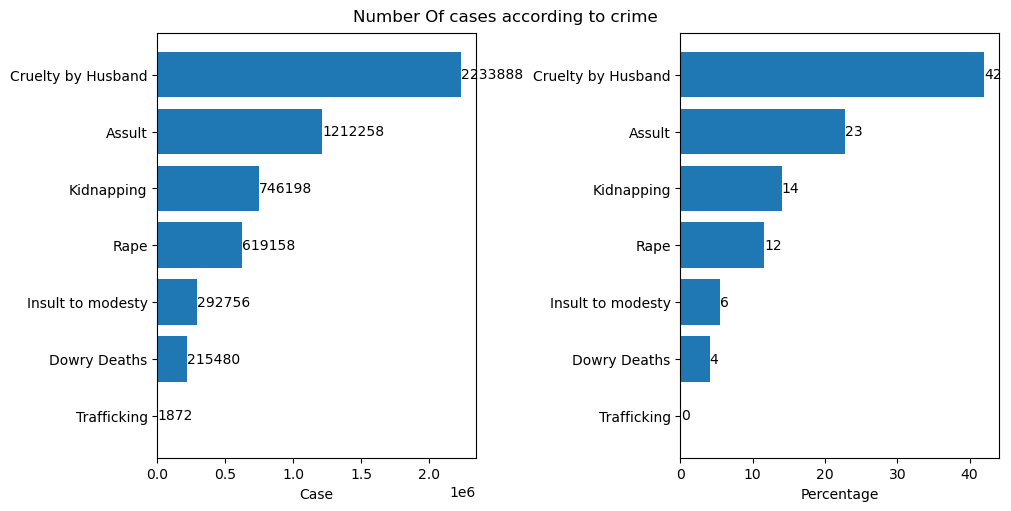

In [30]:
fig ,ax = plt.subplots(1,2, figsize=(10, 5),constrained_layout = True)
hbars = ax[0].barh(crime_summary['Crime'],crime_summary['Case'])
hbars1 = ax[1].barh(crime_summary['Crime'],crime_summary['Percentage'])
ax[0].set_yticks([0,1,2,3,4,5,6],crime_summary['Crime'])

# ax.invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Case')
ax[1].set_xlabel('Percentage')
# Label with specially formatted floats
ax[0].bar_label(hbars, fmt='%.f')
ax[1].bar_label(hbars1, fmt='%.f')
fig.suptitle("Number Of cases according to crime")
# ax.set_xlim(right=15)  # adjust xlim to fit labels
# fig.tight_layout(pad=5.0)
plt.show()

In [31]:
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [90]:
temp_df = pd.melt(df,id_vars=['STATE/UT','Year'], value_vars=['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],var_name='Crime', value_name='Case')

In [92]:
temp_df['STATE/UT'].nunique()#.value_counts()

72

In [123]:
temp_df['Year'].nunique()

14

In [93]:
temp_df['STATE/UT'].str.strip().nunique()

72

As we can see there are 72 state in 'STATE/UT' column which can be not possible so let do some clean up.

In [124]:
36*14

504

In [94]:
temp_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [95]:
temp_df['STATE/UT'] = temp_df['STATE/UT'].str.lower()

In [96]:
temp_df['STATE/UT'].nunique()

39

In [97]:
temp_df['STATE/UT'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'a&n islands',
       'd&n haveli', 'delhi ut', 'telangana'], dtype=object)

In [98]:
temp_df['STATE/UT'].mask(temp_df['STATE/UT'] =='a&n islands', 'a & n islands', inplace=True)
temp_df['STATE/UT'].mask(temp_df['STATE/UT'] =='d&n haveli','d & n haveli',inplace=True)
temp_df['STATE/UT'].mask(temp_df['STATE/UT']=='delhi ut','delhi',inplace=True)

In [125]:
temp_df['STATE/UT'].nunique()

36

In [105]:

temp_df['STATE/UT'].str.title().unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry', 'Telangana'],
      dtype=object)

In [106]:
temp_df['STATE/UT'] = temp_df['STATE/UT'].str.title()

In [132]:
temp_df = temp_df.groupby(['STATE/UT','Year'])['Case'].sum().reset_index()

In [145]:
df_heatmap = temp_df.pivot(index='STATE/UT',columns='Year',values='Case')

<AxesSubplot:xlabel='Year', ylabel='STATE/UT'>

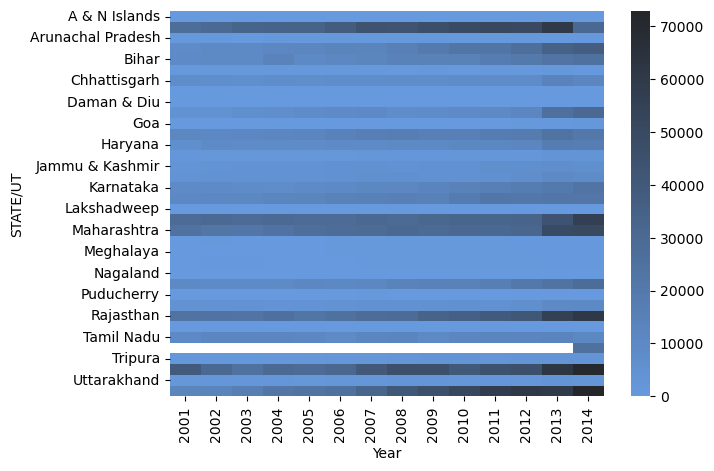

In [166]:
plt.figure(figsize=(7,5))
cmap_apalatte =sns.dark_palette("#69d", reverse=True, as_cmap=True) # sns.color_palette("crest", as_cmap=True) | sns.cubehelix_palette(as_cmap=True)
sns.heatmap(df_heatmap,cmap=cmap_apalatte) #cmap="crest"